## IMDB Top 250 Movies List <br>

In this notebook, I'm simply playing with IMDB movies data for top 250 films. Please note, I scarpped this data on 1st November, 2018, so the stats will be different if you're viewing this notebook quite after some time.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns

In [2]:
df = pd.read_csv('./imdb-top-250.csv')

### Quick data Inspection

Let's check what kind of data we've before doing any kind of analytics operartion.

In [3]:
df.shape

(253, 15)

The dataframe has 253 records, but we're talking about only 250 movies. One was we find the odd-one-outs by finding null records.

In [4]:
df[ df['rank'].isnull() ]

,rank,title,year,link,linkMeta,director,starring,score,rating,duration,genre,metadate,summarytext,creditsInfo,storyline
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.dropna( subset=['rank'] )
df.shape

(250, 15)

Not, we have removed null value columns, let's check quickly what kind of columns we have.

In [6]:
df.sample(5)

,rank,title,year,link,linkMeta,director,starring,score,rating,duration,genre,metadate,summarytext,creditsInfo,storyline
114,114.0,All About Eve,1950.0,https://www.imdb.com/title/tt0042192/?pf_rd_m=...,"Joseph L. Mankiewicz (dir.), Bette Davis, Anne...",Joseph L. Mankiewicz,"Bette Davis, Anne Baxter",8.2,2h,|Drama,27,"['2h', '18min', '|', 'Drama', '|', '27', 'Octo...",An ingenue insinuates herself into the company...,"[<div class=""credit_summary_item"">\n<h4 class=...",Eve (Anne Baxter) is waiting backstage to ...
130,130.0,The Third Man,1949.0,https://www.imdb.com/title/tt0041959/?pf_rd_m=...,"Carol Reed (dir.), Orson Welles, Joseph Cotten",Carol Reed,"Orson Welles, Joseph Cotten",8.2,1h,|Film-Noir,Mystery,"['1h', '44min', '|', 'Film-Noir', ',', 'Myster...",Pulp novelist Holly Martins travels to shadowy...,"[<div class=""credit_summary_item"">\n<h4 class=...","An out of work pulp fiction novelist, Holl..."
219,219.0,"Monsters, Inc.",2001.0,https://www.imdb.com/title/tt0198781/?pf_rd_m=...,"Pete Docter (dir.), Billy Crystal, John Goodman",Pete Docter,"Billy Crystal, John Goodman",8.0,G,1h32min,Animation,"['G', '|', '1h', '32min', '|', 'Animation', ',...","In order to power the city, monsters have to s...","[<div class=""credit_summary_item"">\n<h4 class=...",A city of monsters with no humans called M...
118,118.0,Unforgiven,1992.0,https://www.imdb.com/title/tt0105695/?pf_rd_m=...,"Clint Eastwood (dir.), Clint Eastwood, Gene Ha...",Clint Eastwood,"Clint Eastwood, Gene Hackman",8.2,R,2h10min,Drama,"['R', '|', '2h', '10min', '|', 'Drama', ',', '...",Retired Old West gunslinger William Munny relu...,"[<div class=""credit_summary_item"">\n<h4 class=...",The town of Big Whisky is full of normal p...
101,101.0,Good Will Hunting,1997.0,https://www.imdb.com/title/tt0119217/?pf_rd_m=...,"Gus Van Sant (dir.), Robin Williams, Matt Damon",Gus Van Sant,"Robin Williams, Matt Damon",8.3,R,2h6min,Drama,"['R', '|', '2h', '6min', '|', 'Drama', ',', 'R...","Will Hunting, a janitor at M.I.T., has a gift ...","[<div class=""credit_summary_item"">\n<h4 class=...",A touching tale of a wayward young man who...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 1 to 250
Data columns (total 15 columns):
rank           250 non-null float64
title          250 non-null object
year           250 non-null float64
link           250 non-null object
linkMeta       250 non-null object
director       250 non-null object
starring       250 non-null object
score          250 non-null float64
rating         249 non-null object
duration       249 non-null object
genre          249 non-null object
metadate       249 non-null object
summarytext    249 non-null object
creditsInfo    249 non-null object
storyline      249 non-null object
dtypes: float64(3), object(12)
memory usage: 31.2+ KB


In [8]:
df.dtypes

rank           float64
title           object
year           float64
link            object
linkMeta        object
director        object
starring        object
score          float64
rating          object
duration        object
genre           object
metadate        object
summarytext     object
creditsInfo     object
storyline       object
dtype: object

In [9]:
df.describe()

,rank,year,score
count,250.000000,250.000000,250.000000
mean,125.500000,1985.120000,8.257200
std,72.312977,24.729736,0.233981
min,1.000000,1921.000000,8.000000
25%,63.250000,1966.000000,8.100000
50%,125.500000,1993.000000,8.200000
75%,187.750000,2005.000000,8.400000
max,250.000000,2018.000000,9.200000


One thing here we can see that we only have two numeric fields in entire dataset. From dataset and columns, it would make more sense if we transform `score` into Numeric type

/home/mukul/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


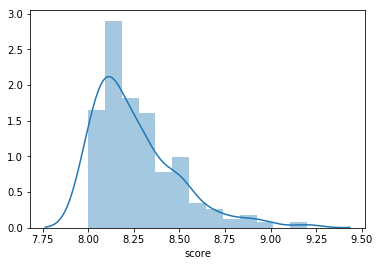

In [21]:
df['score'] = pd.to_numeric(df.score, errors='coerce')
sns.distplot(df['score']);

### Which director has most movies in Top 250

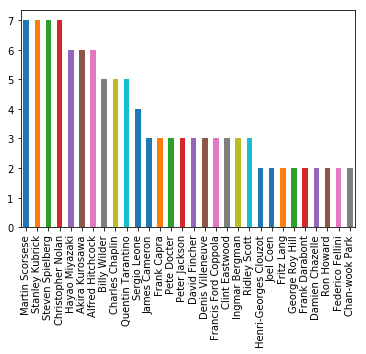

In [11]:
df.director.value_counts().head(30).plot(kind="bar");

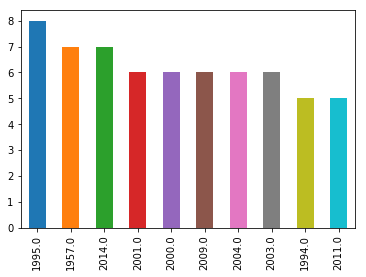

In [14]:
df['year'].value_counts().head(10).plot.bar()

1995 with most movies in top 250 list as of now

In [29]:
df[df.year == 1995.0]

,rank,title,year,link,linkMeta,director,starring,score,rating,duration,genre,metadate,summarytext,creditsInfo,storyline
21,21.0,Se7en,1995.0,https://www.imdb.com/title/tt0114369/?pf_rd_m=...,"David Fincher (dir.), Morgan Freeman, Brad Pitt",David Fincher,"Morgan Freeman, Brad Pitt",8.6,R,2h7min,Crime,"['R', '|', '2h', '7min', '|', 'Crime', ',', 'D...","Two detectives, a rookie and a veteran, hunt a...","[<div class=""credit_summary_item"">\n<h4 class=...",A film about two homicide detectives' (Mor...
26,26.0,The Usual Suspects,1995.0,https://www.imdb.com/title/tt0114814/?pf_rd_m=...,"Bryan Singer (dir.), Kevin Spacey, Gabriel Byrne",Bryan Singer,"Kevin Spacey, Gabriel Byrne",8.5,A,1h46min,Crime,"['A', '|', '1h', '46min', '|', 'Crime', ',', '...",A sole survivor tells of the twisty events lea...,"[<div class=""credit_summary_item"">\n<h4 class=...","Following a truck hijack in New York, five..."
73,73.0,Braveheart,1995.0,https://www.imdb.com/title/tt0112573/?pf_rd_m=...,"Mel Gibson (dir.), Mel Gibson, Sophie Marceau",Mel Gibson,"Mel Gibson, Sophie Marceau",8.3,R,2h58min,Biography,"['R', '|', '2h', '58min', '|', 'Biography', ',...",When his secret bride is executed for assaulti...,"[<div class=""credit_summary_item"">\n<h4 class=...",William Wallace is a Scottish rebel who le...
91,91.0,Toy Story,1995.0,https://www.imdb.com/title/tt0114709/?pf_rd_m=...,"John Lasseter (dir.), Tom Hanks, Tim Allen",John Lasseter,"Tom Hanks, Tim Allen",8.3,1h,|Animation,Adventure,"['1h', '21min', '|', 'Animation', ',', 'Advent...",A cowboy doll is profoundly threatened and jea...,"[<div class=""credit_summary_item"">\n<h4 class=...",A little boy named Andy loves to be in his...
122,122.0,Heat,1995.0,https://www.imdb.com/title/tt0113277/?pf_rd_m=...,"Michael Mann (dir.), Al Pacino, Robert De Niro",Michael Mann,"Al Pacino, Robert De Niro",8.2,R,2h50min,Crime,"['R', '|', '2h', '50min', '|', 'Crime', ',', '...",A group of professional bank robbers start to ...,"[<div class=""credit_summary_item"">\n<h4 class=...",Hunters and their prey--Neil and his profe...
143,143.0,Casino,1995.0,https://www.imdb.com/title/tt0112641/?pf_rd_m=...,"Martin Scorsese (dir.), Robert De Niro, Sharon...",Martin Scorsese,"Robert De Niro, Sharon Stone",8.2,A,2h58min,Crime,"['A', '|', '2h', '58min', '|', 'Crime', ',', '...","A tale of greed, deception, money, power, and ...","[<div class=""credit_summary_item"">\n<h4 class=...",This Martin Scorsese film depicts the Janu...
205,205.0,Before Sunrise,1995.0,https://www.imdb.com/title/tt0112471/?pf_rd_m=...,"Richard Linklater (dir.), Ethan Hawke, Julie D...",Richard Linklater,"Ethan Hawke, Julie Delpy",8.1,R,1h41min,Drama,"['R', '|', '1h', '41min', '|', 'Drama', ',', '...",A young man and woman meet on a train in Europ...,"[<div class=""credit_summary_item"">\n<h4 class=...",American tourist Jesse and French student ...
228,228.0,La haine,1995.0,https://www.imdb.com/title/tt0113247/?pf_rd_m=...,"Mathieu Kassovitz (dir.), Vincent Cassel, Hube...",Mathieu Kassovitz,"Vincent Cassel, Hubert Koundé",8.0,1h,|Crime,Drama,"['1h', '38min', '|', 'Crime', ',', 'Drama', '|...",24 hours in the lives of three young men in th...,"[<div class=""credit_summary_item"">\n<h4 class=...",The film follows three young men and their...


### Word maps of Actors and keywords from Plot description

Every movie has a small description, let's see if there is some pattern we can find in plot keywords by Wordmap

In [ ]:
# plotKeywords = ''
# for x in df['storyline']:
#     plotKeywords += plotKeywords.join(str(x).strip())

# wordcloud = WordCloud(width=1500, height=1000, stopwords = STOPWORDS).generate(plotKeywords)

# # Display the generated image:
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

Should we try out wordmap of actors? Why not.

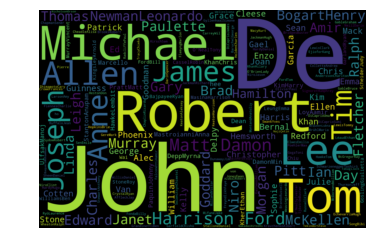

In [17]:
listOfActors = ''
for x in df['starring']:
    stars = str(x).split(',')
    listOfActors = listOfActors.join(stars)

wordcloud = WordCloud(width=1500, height=1000, stopwords = STOPWORDS).generate(listOfActors)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

/home/mukul/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


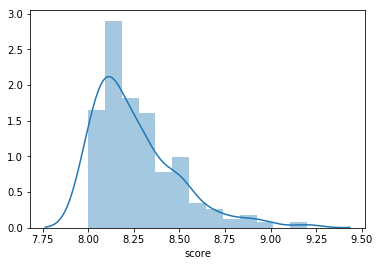

In [20]:
sns.distplot(df['score']);